### 1. Import Packages

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

### 2. Import the Data

In [2]:
cars=pd.read_csv('C:/Users/shamebanerjee/Desktop/Personal_Stuff_1/Analytics/Python/Class 18/Car_sales - 1656244153716.csv')

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [5]:
cars.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### 3.Separating the Categorical and Continuous variable

In [7]:
cars_continuous=cars.select_dtypes('float64')
cars_categorical=cars.select_dtypes('object')

In [8]:
cars_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales_in_thousands      157 non-null    float64
 1   four_year_resale_value  121 non-null    float64
 2   Price_in_thousands      155 non-null    float64
 3   Engine_size             156 non-null    float64
 4   Horsepower              156 non-null    float64
 5   Wheelbase               156 non-null    float64
 6   Width                   156 non-null    float64
 7   Length                  156 non-null    float64
 8   Curb_weight             155 non-null    float64
 9   Fuel_capacity           156 non-null    float64
 10  Fuel_efficiency         154 non-null    float64
 11  Power_perf_factor       155 non-null    float64
dtypes: float64(12)
memory usage: 14.8 KB


In [9]:
cars_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Manufacturer   157 non-null    object
 1   Model          157 non-null    object
 2   Vehicle_type   157 non-null    object
 3   Latest_Launch  157 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


### 4.a) Finding Summary of Continuous and Categorical variables
### 4.b) Outlier and Missing value Treatment for Continuous and Categorical variables
### 4.c) Creating Dummy variables for some categorical variables
### 4.d) Combining the Dataset

#### UDF for finding summary of continuous varibales

In [15]:
def continuous_summary(x):
    
    ### Missing values
    n_total=x.shape[0]
    n_miss=x.isna().sum()
    n_miss_percent=n_miss/n_total*100
    
    ###Outliers
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lcl=q1-1.5*iqr
    ucl=q3+1.5*iqr
    
    return pd.Series([x.dtype,x.nunique(),n_total,x.count(),n_miss,n_miss_percent,x.sum(),x.mean(),x.var(),x.std(),lcl,ucl,
                     x.min(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.1),x.quantile(0.25),x.quantile(0.5),
                    x.quantile(0.75),x.quantile(0.90),x.quantile(0.95),x.quantile(0.99),x.max()],
                    index=['Dtype','Cardinality','N_total','N_count','N_miss','N_miss%','Sum','Mean','Variance','Std_Dev',
                           'lcl','ucl','Min','p1','p5','p10','p25','p50','p75','p90','p95','p99','Max'])

#### Summary of Continuous Variables

In [16]:
cars_continuous.apply(continuous_summary)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Cardinality,157,117,152,31,66,88,78,127,147,55,20,154
N_total,157,157,157,157,157,157,157,157,157,157,157,157
N_count,157,121,155,156,156,156,156,156,155,156,154,155
N_miss,0,36,2,1,1,1,1,1,2,1,3,2
N_miss%,0.0,22.929936,1.273885,0.636943,0.636943,0.636943,0.636943,0.636943,1.273885,0.636943,1.910828,1.273885
Sum,8320.698,2186.83,4245.567,477.5,29008.0,16768.0,11099.4,29225.6,523.594,2800.5,3672.0,11941.756636
Mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.15,187.34359,3.378026,17.951923,23.844156,77.043591
Variance,4628.002257,131.180007,205.969949,1.0913,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558
Std_Dev,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664


#### Outlier Treatment

In [17]:
# Min is P1 and Max is P99

cars_continuous=cars_continuous.apply(lambda x:x.clip(upper=x.quantile(0.99),lower=x.quantile(0.01)))

#### Missing Value Treatment

In [18]:
# Imputing with Mean

cars_continuous=cars_continuous.apply(lambda x:x.fillna(x.mean()))

#### Revised Summary of Continuous Variables

In [19]:
cars_continuous.apply(continuous_summary)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Cardinality,155,116,151,30,65,88,77,126,146,55,20,153
N_total,157,157,157,157,157,157,157,157,157,157,157,157
N_count,157,157,157,157,157,157,157,157,157,157,157,157
N_miss,0,0,0,0,0,0,0,0,0,0,0,0
N_miss%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sum,8025.5292,2829.141298,4290.61297,478.860064,29095.622436,16867.536538,11173.619551,29411.272949,530.528485,2817.848077,3731.298701,12065.384534
Mean,51.11802,18.020008,27.328745,3.050064,185.322436,107.436538,71.169551,187.332949,3.379162,17.948077,23.766234,76.849583
Variance,3331.909938,96.170969,195.259402,0.958686,2771.697606,54.766822,11.420718,171.04011,0.381634,14.497753,15.651182,561.292961
Std_Dev,57.722699,9.80668,13.973525,0.979125,52.646914,7.400461,3.379455,13.07823,0.617766,3.807591,3.956157,23.691622


In [21]:
# There is no missing values for the Categorical Variables
cars_categorical.describe().T

,count,unique,top,freq
Manufacturer,157,30,Dodge,11
Model,157,156,Neon,2
Vehicle_type,157,2,Passenger,116
Latest_Launch,157,130,10/5/2012,2


In [22]:
# Here we are creating dummy variables for the vehicle type and the manufacturer as these variables might be significant 
# Latest Launch and Model are not chosen for this operation as unique values are significantly higher

cars_categorical=pd.get_dummies(cars_categorical.loc[:,['Manufacturer','Vehicle_type']],drop_first=True)

In [24]:
cars_categorical.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

In [25]:
# Renaming column Manufacturer_Mercedes-B as per INC convention

cars_categorical.rename(columns={'Manufacturer_Mercedes-B':'Manufacturer_Mercedes_B'},inplace=True)

In [26]:
cars_categorical.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

In [27]:
# combining the categorical and continuous variables

cars_new=pd.concat([cars_continuous,cars_categorical],axis=1)

In [30]:
cars_new.shape

(157, 42)

In [31]:
cars_new

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225000,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.020008,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,...,0,0,0,0,0,0,0,0,1,1
153,15.245,18.020008,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,...,0,0,0,0,0,0,0,0,1,1
154,17.531,18.020008,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,...,0,0,0,0,0,0,0,0,1,1
155,3.493,18.020008,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,...,0,0,0,0,0,0,0,0,1,1


### 5. Apply Transformations to Data

C:\Users\shamebanerjee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

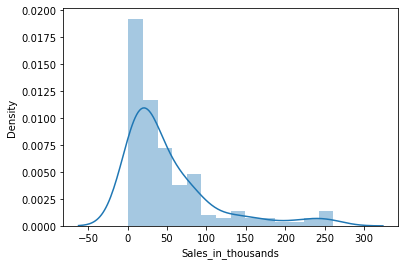

In [32]:
#Here the dependent variables (Sales in Thousands) should follow normal distribution
#In this case we see that the data is right skewedb

sns.distplot(cars_new.Sales_in_thousands)

In [40]:
cars_new.Sales_in_thousands.skew()

1.9924932920508793

In [38]:
# Applying log transformation

cars_new.loc[:,'ln_sales_in_thousands']=np.log(cars_new.Sales_in_thousands)

C:\Users\shamebanerjee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_sales_in_thousands', ylabel='Density'>

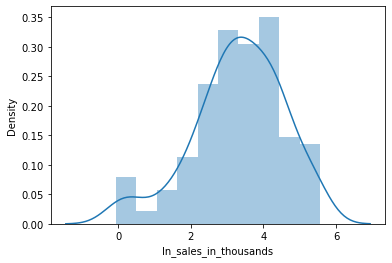

In [39]:
#Here we see that the dependent variable is near normal

sns.distplot(cars_new.ln_sales_in_thousands)

In [41]:
cars_new.ln_sales_in_thousands.skew()

-0.5925861100519006

### 6. Variable Selection
### 6.a) Correlation
### 6.b) F-Regression
### 6.c) VIF - For Multicollinearity

<AxesSubplot:>

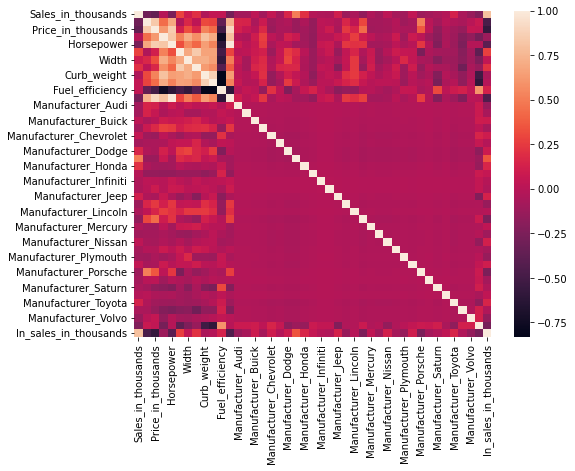

In [43]:
#6.a)Correlation

plt.figure(figsize=(8,6))
sns.heatmap(cars_new.corr())

In [44]:
cars_new.corr().to_excel('C:/Users/shamebanerjee/Desktop/Personal_Stuff_1/Analytics/Python/Class 18/corr_car_sales.xlsx')

In [61]:
#6.b) F-Regression

# Separating the y variable from x variables
x_var=cars_new.columns.difference(['Sales_in_thousands','ln_sales_in_thousands'])

#applying f_regression
f_val,p_val=f_regression(cars_new[x_var],cars_new.ln_sales_in_thousands)

#Creating a Dataframe to view Feature,f-value and p-value adjacently

Feature_temp=pd.DataFrame([x_var,f_val,p_val]).T
Feature_temp.columns=['Features','F_value','P_value']

#Considering those features whose p-value is less than 0.1

Feature=list(Feature_temp.loc[Feature_temp.P_value<=0.1,'Features'])

In [63]:
#Number of Features
len(Feature)

16

In [74]:
#6.c) Multicollinearity

formula='ln_sales_in_thousands ~ ' + '+'.join(Feature)
y,x=dmatrices(formula,cars_new,return_type='dataframe')

vif=pd.DataFrame()

vif['Features']=x.columns
vif['VIF_Score']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [76]:
vif

,Features,VIF_Score
0,Intercept,644.058154
1,Fuel_efficiency,4.393539
2,Horsepower,214.842893
3,Length,5.666776
4,Manufacturer_Audi,1.073516
5,Manufacturer_Ford,1.091235
6,Manufacturer_Honda,1.092045
7,Manufacturer_Mercedes_B,1.722476
8,Manufacturer_Plymouth,1.181433
9,Manufacturer_Porsche,1.675094


In [79]:
# Here we are not eliminating Price_in_thousands as it is an important variable for determining sales 

final_feature=list(vif.loc[vif.VIF_Score<30,'Features'])

In [81]:
#We create the model using these 14 features for now

len(final_feature)

14

### 7. Model Building
### 7.a) Train Test Split
### 7.b) Model Building
### 7.c) Model accuracy

In [84]:
# 7.a) Train Test Split

train,test = train_test_split(cars_new,test_size=0.3,random_state=1)

In [92]:
final_formula='ln_sales_in_thousands ~ ' + ' + '.join(final_feature) 
final_formula

'ln_sales_in_thousands ~ Fuel_efficiency + Length + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'

In [93]:
# 7.b) Build Model (Linear Regression - Ordinary Least Square) on Train and fit the model

model=smf.ols(final_formula,train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.549
Model:                               OLS   Adj. R-squared:                  0.482
Method:                    Least Squares   F-statistic:                     8.173
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):           3.90e-11
Time:                           18:48:08   Log-Likelihood:                -134.83
No. Observations:                    109   AIC:                             299.7
Df Residuals:                         94   BIC:                             340.0
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [94]:
#From the summary report we eliminate Manufacturer_Mercedes_B since it has the highest p-value and rebuild the model

final_formula='''ln_sales_in_thousands ~ Fuel_efficiency + Length + Manufacturer_Audi + Manufacturer_Ford + 
Manufacturer_Honda + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + 
Manufacturer_Volvo + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'''

model=smf.ols(final_formula,train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.549
Model:                               OLS   Adj. R-squared:                  0.487
Method:                    Least Squares   F-statistic:                     8.896
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):           1.26e-11
Time:                           18:48:19   Log-Likelihood:                -134.83
No. Observations:                    109   AIC:                             297.7
Df Residuals:                         95   BIC:                             335.3
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [95]:
#From the summary report we eliminate four_year_resale_value since it has the highest p-value and rebuild the model

final_formula='''ln_sales_in_thousands ~ Fuel_efficiency + Length + Manufacturer_Audi + Manufacturer_Ford + 
Manufacturer_Honda + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + 
Manufacturer_Volvo + Price_in_thousands + Vehicle_type_Passenger + Wheelbase'''

model=smf.ols(final_formula,train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.549
Model:                               OLS   Adj. R-squared:                  0.493
Method:                    Least Squares   F-statistic:                     9.736
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):           3.95e-12
Time:                           18:49:03   Log-Likelihood:                -134.84
No. Observations:                    109   AIC:                             295.7
Df Residuals:                         96   BIC:                             330.7
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [96]:
#From the summary report we eliminate Length  since it has the highest p-value and rebuild the model

final_formula='''ln_sales_in_thousands ~ Fuel_efficiency + Manufacturer_Audi + Manufacturer_Ford + 
Manufacturer_Honda + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + 
Manufacturer_Volvo + Price_in_thousands + Vehicle_type_Passenger + Wheelbase'''

model=smf.ols(final_formula,train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.549
Model:                               OLS   Adj. R-squared:                  0.497
Method:                    Least Squares   F-statistic:                     10.72
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):           1.19e-12
Time:                           18:50:04   Log-Likelihood:                -134.87
No. Observations:                    109   AIC:                             293.7
Df Residuals:                         97   BIC:                             326.0
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [97]:
#From the summary report we eliminate Manufacturer_Honda since it has the highest p-value and rebuild the model

final_formula='''ln_sales_in_thousands ~ Fuel_efficiency + Manufacturer_Audi + Manufacturer_Ford + 
Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + 
Manufacturer_Volvo + Price_in_thousands + Vehicle_type_Passenger + Wheelbase'''

model=smf.ols(final_formula,train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.547
Model:                               OLS   Adj. R-squared:                  0.501
Method:                    Least Squares   F-statistic:                     11.85
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):           3.80e-13
Time:                           18:50:52   Log-Likelihood:                -135.02
No. Observations:                    109   AIC:                             292.0
Df Residuals:                         98   BIC:                             321.7
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [98]:
#From the summary report we eliminate Manufacturer_Porsche since it has the highest p-value and rebuild the model

final_formula='''ln_sales_in_thousands ~ Fuel_efficiency + Manufacturer_Audi + Manufacturer_Ford + 
Manufacturer_Plymouth + Manufacturer_Toyota + 
Manufacturer_Volvo + Price_in_thousands + Vehicle_type_Passenger + Wheelbase'''

model=smf.ols(final_formula,train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.546
Model:                               OLS   Adj. R-squared:                  0.505
Method:                    Least Squares   F-statistic:                     13.22
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):           1.17e-13
Time:                           18:51:51   Log-Likelihood:                -135.20
No. Observations:                    109   AIC:                             290.4
Df Residuals:                         99   BIC:                             317.3
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [99]:
#From the summary report we eliminate Manufacturer_Audi since it has the highest p-value and rebuild the model

final_formula='''ln_sales_in_thousands ~ Fuel_efficiency + Manufacturer_Ford + 
Manufacturer_Plymouth + Manufacturer_Toyota + 
Manufacturer_Volvo + Price_in_thousands + Vehicle_type_Passenger + Wheelbase'''

model=smf.ols(final_formula,train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.538
Model:                               OLS   Adj. R-squared:                  0.501
Method:                    Least Squares   F-statistic:                     14.57
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):           6.45e-14
Time:                           18:52:37   Log-Likelihood:                -136.12
No. Observations:                    109   AIC:                             290.2
Df Residuals:                        100   BIC:                             314.5
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [100]:
#From the summary report we eliminate Manufacturer_Volvo since it has the highest p-value and rebuild the model

final_formula='''ln_sales_in_thousands ~ Fuel_efficiency + Manufacturer_Ford + 
Manufacturer_Plymouth + Manufacturer_Toyota + Price_in_thousands + Vehicle_type_Passenger + Wheelbase'''

model=smf.ols(final_formula,train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.529
Model:                               OLS   Adj. R-squared:                  0.497
Method:                    Least Squares   F-statistic:                     16.23
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):           3.72e-14
Time:                           18:53:22   Log-Likelihood:                -137.15
No. Observations:                    109   AIC:                             290.3
Df Residuals:                        101   BIC:                             311.8
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [101]:
#From the summary report we eliminate Manufacturer_Toyota since it has the highest p-value and rebuild the model

final_formula='''ln_sales_in_thousands ~ Fuel_efficiency + Manufacturer_Ford + 
Manufacturer_Plymouth + Price_in_thousands + Vehicle_type_Passenger + Wheelbase'''

model=smf.ols(final_formula,train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.520
Model:                               OLS   Adj. R-squared:                  0.491
Method:                    Least Squares   F-statistic:                     18.39
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):           2.22e-14
Time:                           18:54:05   Log-Likelihood:                -138.27
No. Observations:                    109   AIC:                             290.5
Df Residuals:                        102   BIC:                             309.4
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [102]:
# Since all the variables are quite significant we go ahead with the above model and features
#7.c) We Predict train and test and check for accuracies

train_predicted=np.exp(model.predict(train))
test_predicted=np.exp(model.predict(test))

In [104]:
#MAPE

train_mape=mean_absolute_percentage_error(train.Sales_in_thousands,train_predicted)
test_mape=mean_absolute_percentage_error(test.Sales_in_thousands,test_predicted)

print('Train mape : ',train_mape,'| Test Mape: ',test_mape)

Train mape :  1.0656377684688252 | Test Mape:  0.7640046888880477


In [105]:
#MAE

train_mae=mean_absolute_error(train.Sales_in_thousands,train_predicted)
test_mae=mean_absolute_error(test.Sales_in_thousands,test_predicted)

print('Train mae : ',train_mae,'| Test Mae: ',test_mae)

Train mae :  28.20214155837225 | Test Mae:  32.09200849412995


In [108]:
#MSE

train_mse=mean_squared_error(train.Sales_in_thousands,train_predicted)
test_mse=mean_squared_error(test.Sales_in_thousands,test_predicted)

print('Train mse : ',train_mse,'| Test Mse: ',test_mse)
print('Train Rmse : ',np.sqrt(train_mse),'| Test RMse: ',np.sqrt(test_mse))

Train mse :  2385.3781016623448 | Test Mse:  2781.9843685025826
Train Rmse :  48.84033273496757 | Test RMse:  52.74451979592366


### 8. Finding out reason of High Inaccuracy

C:\Users\shamebanerjee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

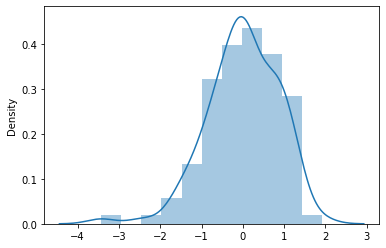

In [110]:
# Residual or error should follow normal distrbution
# We see it is more or less normally distributed

sns.distplot(model.resid)

C:\Users\shamebanerjee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Sales_in_thousands'>

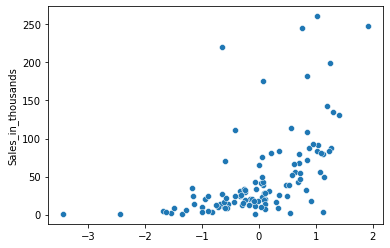

In [111]:
# Check for Homoscedasticity for errors
# We see that there is homoscedasticity in the data and hence linear regression is not a correct modelling technique to be used for this data

sns.scatterplot(model.resid,train.Sales_in_thousands)

### 9. Decile Analysis

In [116]:
train_data=pd.DataFrame([train.Sales_in_thousands,train_predicted]).T
test_data=pd.DataFrame([test.Sales_in_thousands,test_predicted]).T

In [117]:
train_data.columns=['y_actual','y_predicted']
test_data.columns=['y_actual','y_predicted']

In [118]:
train_data['Deciles']=pd.qcut(train_predicted,10,labels=False)
test_data['Deciles']=pd.qcut(test_predicted,10,labels=False)

In [120]:
train_data=train_data.groupby('Deciles').mean().reset_index().sort_values(by='Deciles',ascending=False)
test_data=test_data.groupby('Deciles').mean().reset_index().sort_values(by='Deciles',ascending=False)

In [121]:
# Problem in Decile 7 and 8
train_data

,Deciles,y_actual,y_predicted
9,9,134.740665,136.113908
8,8,68.048091,53.828296
7,7,44.383273,40.097824
6,6,74.773545,35.470880
5,5,60.800200,29.496240
4,4,40.410000,25.675046
3,3,26.166000,22.645349
2,2,18.691091,18.142007
1,1,17.208935,13.704651
0,0,5.523025,5.686068


In [122]:
#Problem in Decile 3,7,8
test_data

,Deciles,y_actual,y_predicted
9,9,147.586864,212.800189
8,8,62.257200,68.282721
7,7,101.847600,43.389156
6,6,64.789750,38.530487
5,5,52.457600,30.487073
4,4,52.505400,24.716460
3,3,22.762250,20.274721
2,2,31.924400,16.957911
1,1,13.034200,11.640651
0,0,5.972400,3.636319


### Possible Reasons for Poor Model Performance